In [6]:
from low_light import *
import matplotlib.pyplot as plt

In [7]:
def dehaze(I, tmin=0.1, w=15, alpha=0.4, omega=0.75, p=0.1, eps=1e-3, reduce=False):
    I = np.asarray(I, dtype=np.float64) # Convert the input to a float array.
    I = I[:, :, :3] / 255
    m, n, _ = I.shape
    Idark, Ibright = get_illumination_channel(I, w)
    A = get_atmosphere(I, Ibright, p)
 
    init_t = get_initial_transmission(A, Ibright) 
    if reduce:
        init_t = reduce_init_t(init_t)
    corrected_t = get_corrected_transmission(I, A, Idark, Ibright, init_t, alpha, omega, w)
 
    normI = (I - I.min()) / (I.max() - I.min())
    refined_t = guided_filter(normI, corrected_t, w, eps) # applying guided filter
    J_refined = get_final_image(I, A, refined_t, tmin)
     
    enhanced = (J_refined*255).astype(np.uint8)
    f_enhanced = cv2.detailEnhance(enhanced, sigma_s=10, sigma_r=0.15)
    f_enhanced = cv2.edgePreservingFilter(f_enhanced, flags=1, sigma_s=64, sigma_r=0.2)
    return f_enhanced


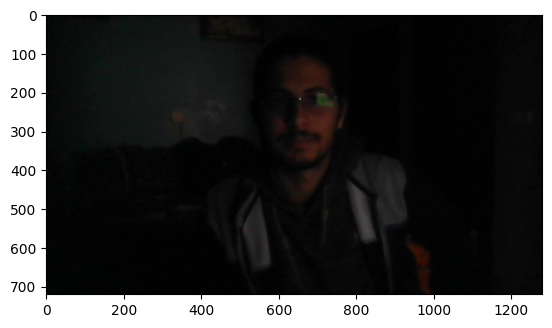

In [8]:
img_path = "../data/test/low_light_4.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

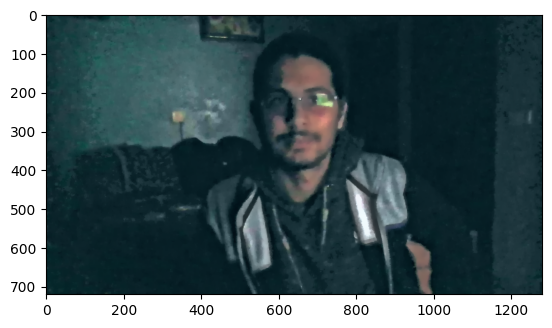

In [11]:
img_path = "../data/test/low_light_4.jpg"
img = cv2.imread(img_path)
enhanced = dehaze(img)
plt.imshow(enhanced[:,:,::-1])

In [12]:
cv2.imwrite("../data/test/low_light_4_enhanced.jpg", enhanced)

True